In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [48]:
data.rename(columns={'Clothing ID': 'ID', 'Review Text':'Review', 'Recommended IND': 'Recommended','Division Name': 'Division', 'Department Name':'Department', 'Class Name': 'Class'}, inplace=True)

In [49]:
data.head()

,Unnamed: 0,ID,Age,Title,Review,Rating,Recommend,Positive Feedback Count,Division,Department,Class
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# Wiek

## Ilość komentarzy, a wiek

Text(0.5, 1.0, 'Ilość opinii w zależności od wieku kupującego')

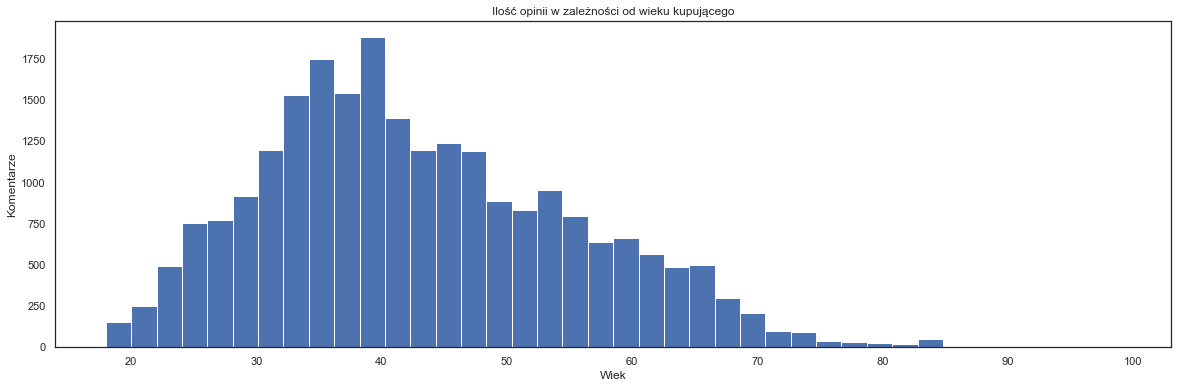

In [67]:
sns.set(rc={'figure.figsize':(20,6)})
sns.set_style("white")
plt.hist(data.Age, bins=40)
plt.xlabel('Wiek')
plt.ylabel('Komentarze')
plt.title('Ilość opinii w zależności od wieku kupującego')

## Rozkład ocen wg wieku

Text(0, 0.5, 'Wiek')

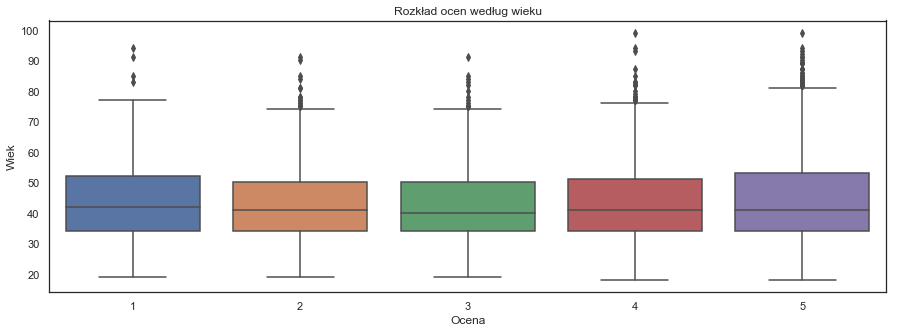

In [76]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("white")
sns.boxplot(x = 'Rating', y = 'Age', data = data)
plt.title('Rozkład ocen według wieku');
plt.xlabel('Ocena')
plt.ylabel('Wiek')


## Rozkład ocen ogółem

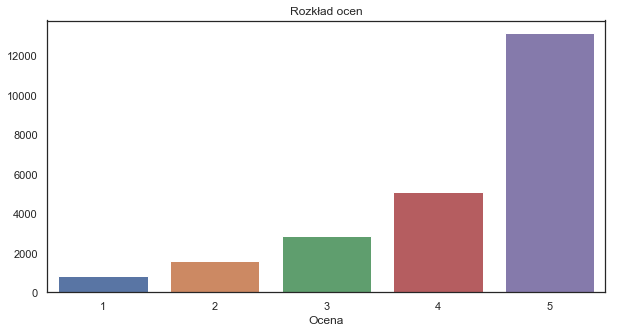

In [80]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("white")
plt.title('Rozkład ocen') 
sns.countplot(x = 'Rating', data = data)
plt.xlabel('Ocena')
plt.ylabel('')
sns.set_style("white")

# Grupy

## Grupy wg popularności

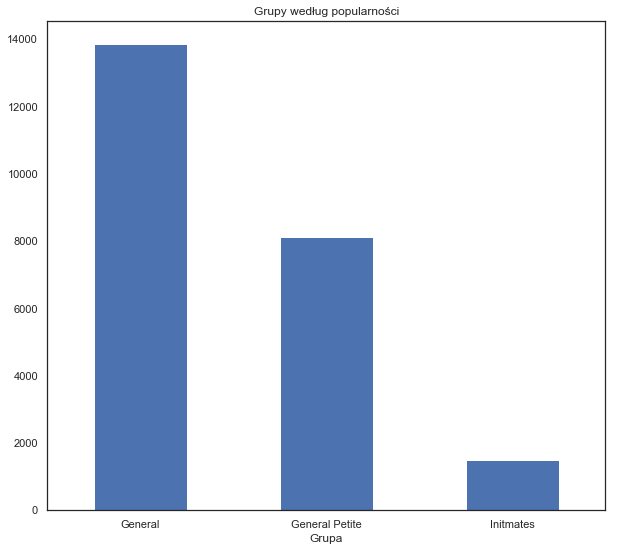

In [152]:
fig = plt.figure(figsize=(10, 9))
plt.title('Grupy według popularności') 
plt.xlabel('Grupa')
plt.ylabel('')
data['Division'].value_counts()[:].plot(kind='bar')
oceny_kategoria = plt.xticks(rotation=360)

## Ilość ocen w zależności od grupy

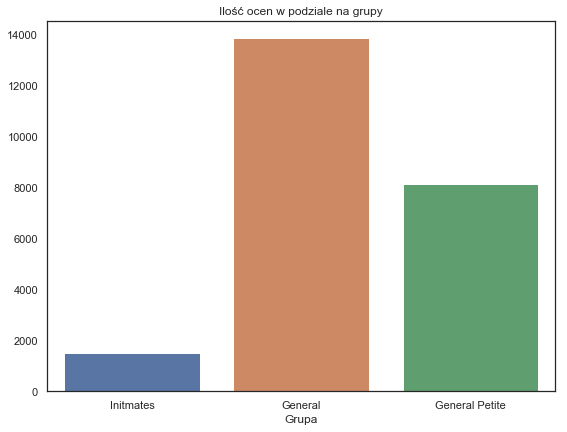

In [57]:
fig = plt.figure(figsize=(20, 15))
oceny_grupa = plt.subplot2grid((2, 2), (0, 0))
oceny_grupa = plt.xticks(rotation=360)
oceny_grupa = sns.countplot(data['Division'])
ax1 = plt.title("Ilość ocen w podziale na grupy")
plt.xlabel('Grupa')
plt.ylabel('')
sns.set_style("white")

## Ilość produktów polecanych i niepolecanych - w podziale na grupę

In [94]:
recommended = data[data['Recommend']==1]
not_recommended = data[data['Recommend']==0]

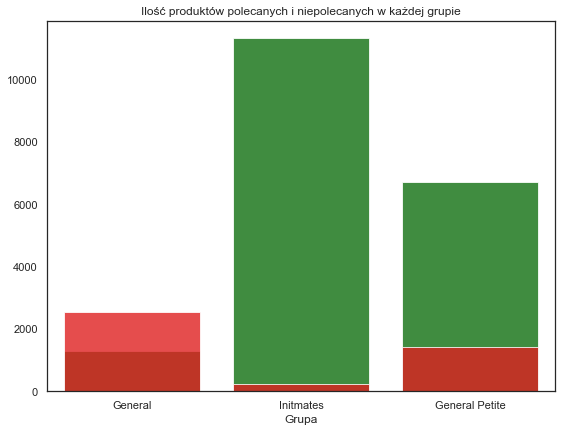

In [95]:
fig = plt.figure(figsize=(20, 15))
pol_grupa = plt.subplot2grid((2, 2), (0, 0))
pol_grupa = sns.countplot(recommended['Division'], color = "green", alpha = 0.8, label = "Recommended")
pol_grupa = sns.countplot(not_recommended['Division'], color = "red", alpha = 0.8, label = "Not Recommended")
pol_grupa = plt.title("Ilość produktów polecanych i niepolecanych w każdej grupie")
sns.set_style("white")
plt.xlabel('Grupa')
plt.ylabel('')
sns.set_style("white")

## Rozkład ocen według grupy

Text(0, 0.5, 'Ocena')

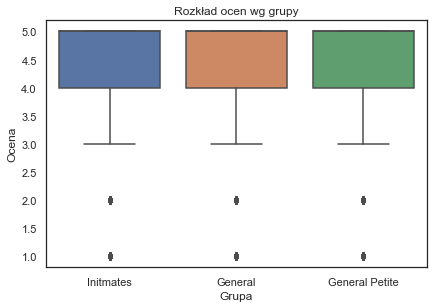

In [154]:
fig = plt.figure(figsize=(15, 10))
grupa = plt.subplot2grid((2, 2), (0, 0))
grupa = sns.boxplot(x="Division", y="Rating", data=data)
grupa = plt.title('Rozkład ocen wg grupy')
plt.xlabel('Grupa')
plt.ylabel('Ocena')

# Kategorie

## Kategorie wg popularności

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

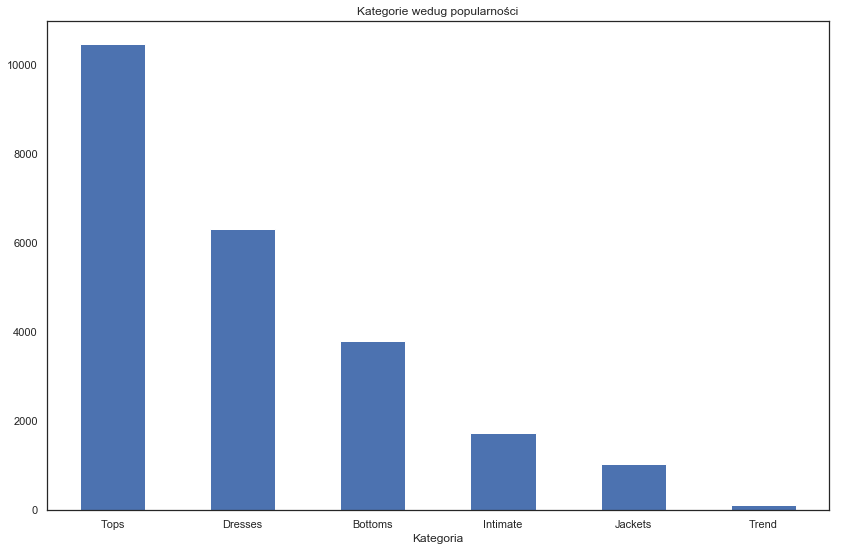

In [157]:
fig = plt.figure(figsize=(14, 9))
plt.xlabel('Kategoria')
plt.ylabel('')
plt.title('Kategorie wedug popularności')
data['Department'].value_counts()[:].plot(kind='bar')
plt.xticks(rotation=360)

## Ilość ocen w podziale na kategorie

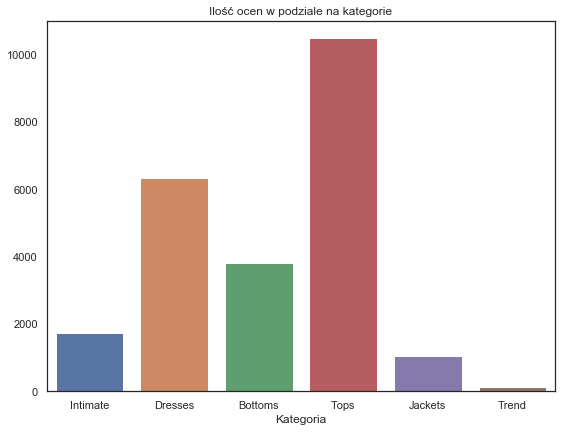

In [107]:
fig = plt.figure(figsize=(20, 15))
oceny_kategoria = plt.subplot2grid((2, 2), (0, 0))
oceny_kategoria = plt.xticks(rotation=360)
oceny_kategoria = sns.countplot(data['Department'])
ax1 = plt.title("Ilość ocen w podziale na kategorie")
plt.xlabel('Kategoria')
plt.ylabel('')
sns.set_style("white")


## Ilość produktów polecanych i niepolecanych - w podziale na kategorię

Text(0, 0.5, '')

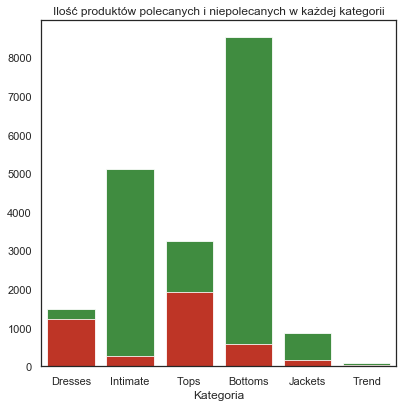

In [143]:
fig = plt.figure(figsize=(14, 14))
pol_kat = plt.subplot2grid((2, 2), (0, 0))
pol_kat = sns.countplot(recommended['Department'], color = "green", alpha = 0.8, label = "Recommended")
pol_kat = sns.countplot(not_recommended['Department'], color = "red", alpha = 0.8, label = "Not Recommended")
pol_kat = plt.title("Ilość produktów polecanych i niepolecanych w każdej kategorii")
sns.set_style("white")
plt.xlabel('Kategoria')
plt.ylabel('')

## Rozkład ocen wg kategorii

Text(0, 0.5, '')

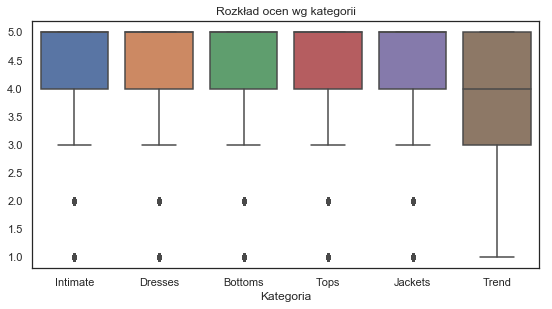

In [158]:
fig = plt.figure(figsize=(20, 10))
kategoria = plt.subplot2grid((2, 2), (0, 0))
kategoria = sns.boxplot(x="Department", y="Rating", data=data)
kategoria = plt.title('Rozkład ocen wg kategorii')
plt.xlabel('Kategoria')
plt.ylabel('')

# Rodzaj

## Rodzaje wg popularności

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

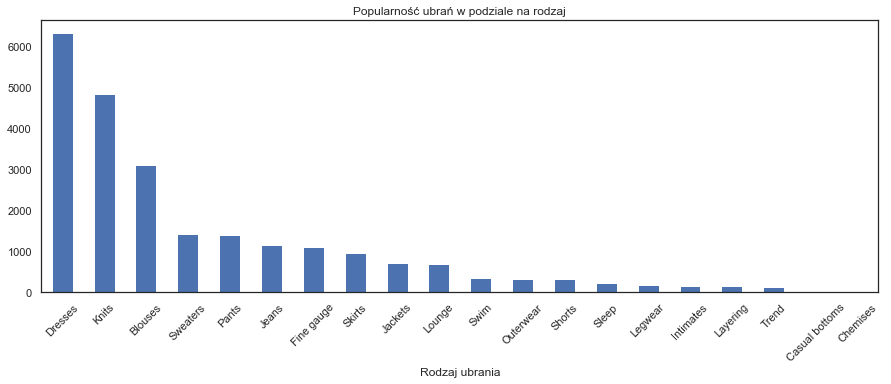

In [162]:
fig = plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
plt.xlabel('Rodzaj ubrania')
plt.ylabel('')
plt.title("Popularność ubrań w podziale na rodzaj")
data['Class'].value_counts()[:].plot(kind='bar')
plt.xticks(rotation=45)

## Ilość ocen w podziale na rodzaj

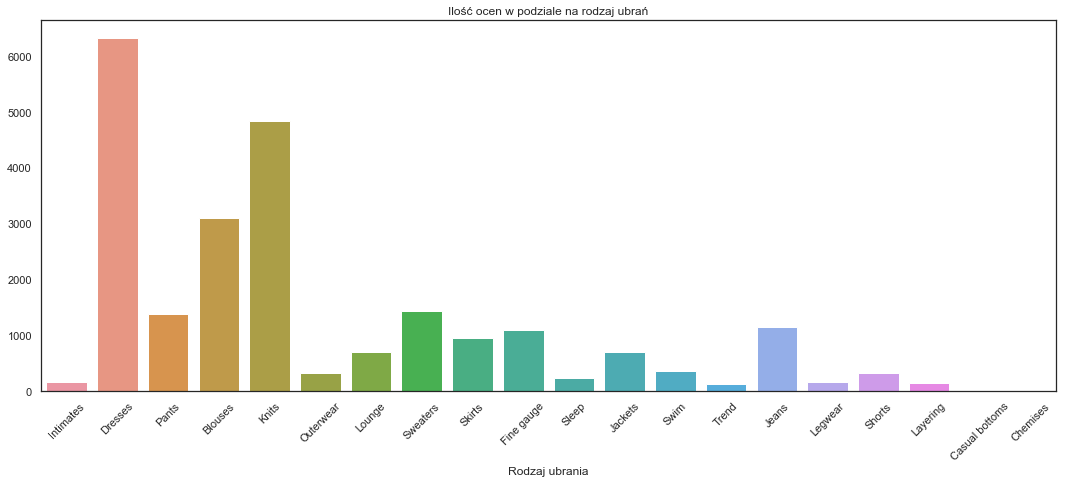

In [55]:
fig = plt.figure(figsize=(40, 15))
oceny_rodzaj = plt.subplot2grid((2, 2), (0, 0))
oceny_rodzaj = plt.xticks(rotation=45)
oceny_rodzaj = sns.countplot(data['Class'])
ax1 = plt.title("Ilość ocen w podziale na rodzaj ubrań")
plt.xlabel('Rodzaj ubrania')
plt.ylabel('')
sns.set_style("white")

## Ilość produktów polecanych i niepolecanych - w podziale na rodzaj ubrania

Text(0, 0.5, '')

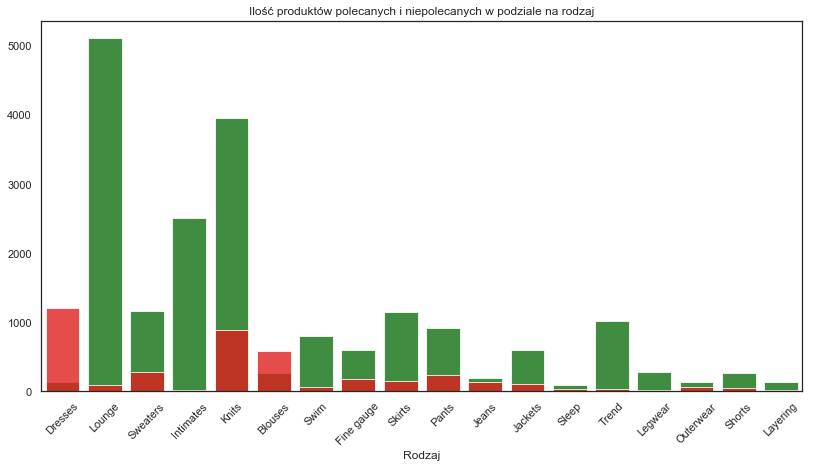

In [163]:
fig = plt.figure(figsize=(30, 15))
pol_rodz = plt.subplot2grid((2, 2), (0, 0))
pol_rodz = plt.xticks(rotation=45)
pol_rodz = sns.countplot(recommended['Class'], color = "green", alpha = 0.8, label = "Recommended")
pol_rodz = sns.countplot(not_recommended['Class'], color = "red", alpha = 0.8, label = "Not Recommended")
pol_rodz = plt.title("Ilość produktów polecanych i niepolecanych w podziale na rodzaj")
sns.set_style("white")
plt.xlabel('Rodzaj')
plt.ylabel('')

## Rozkład ocen wg rodzaju

Text(0, 0.5, '')

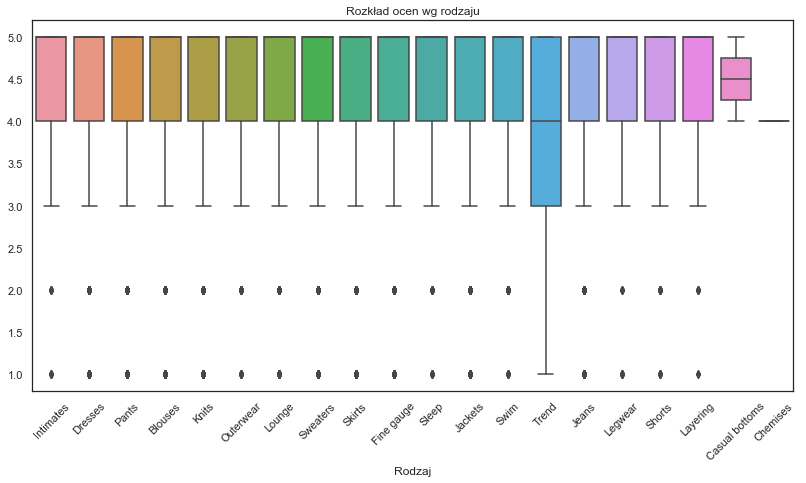

In [150]:
fig = plt.figure(figsize=(30, 15))
grupa = plt.subplot2grid((2, 2), (0, 0))
grupa = plt.xticks(rotation=45)
grupa = sns.boxplot(x="Class", y="Rating", data=data)
grupa = plt.title('Rozkład ocen wg rodzaju')
plt.xlabel('Rodzaj')
plt.ylabel('')

# Najbardziej popularne produkty

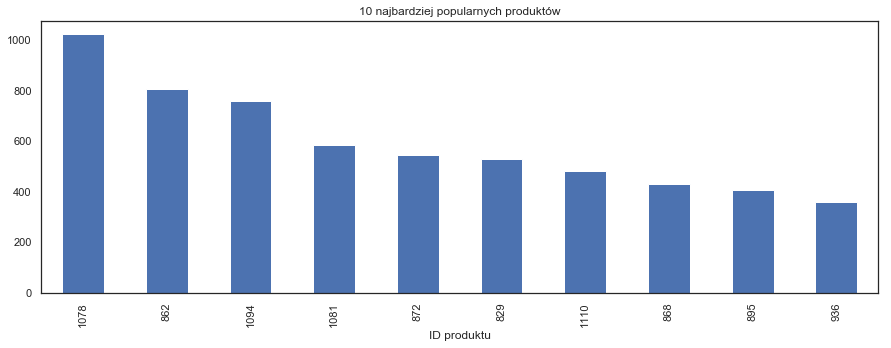

In [165]:
fig = plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
plt.xlabel('ID produktu')
plt.ylabel('')
plt.title("10 najbardziej popularnych produktów")
data['ID'].value_counts()[:10].plot(kind='bar')